# Experimental FLD scoring 

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

from peakqc.fld_scoring import *
import peakqc.insertsizes as ins

In [2]:
fragments_file = "/mnt/workspace2/jdetlef/data/public_data/fragments_heart_left_ventricle_194_sorted.bed"
h5ad_file = "/mnt/workspace2/jdetlef/data/public_data/heart_lv_SM-JF1NY.h5ad"
bamfile = "/mnt/workspace2/jdetlef/data/public_data/sorted_heart_left_ventricle_194.bam"

In [3]:
adata = sc.read_h5ad(h5ad_file)
adata_barcodes = adata.obs.index.tolist()

# split index for barcodes CBs
barcodes = []
for entry in adata_barcodes:
    barcode = entry.split('+')[1]
    barcodes.append(barcode)

In [4]:
adata.obs['stripped_barcodes'] = barcodes
adata.obs = adata.obs.set_index('stripped_barcodes')
adata_f = adata.copy()
adata_b = adata.copy()

Count insertsizes from fragments...
Starting counting fragments...


Processing Chunks: 17it [01:12,  4.24s/it]


Done reading file - elapsed time: 0:01:37
Converting counts to dataframe...
Done getting insertsizes from fragments!
plotting density...


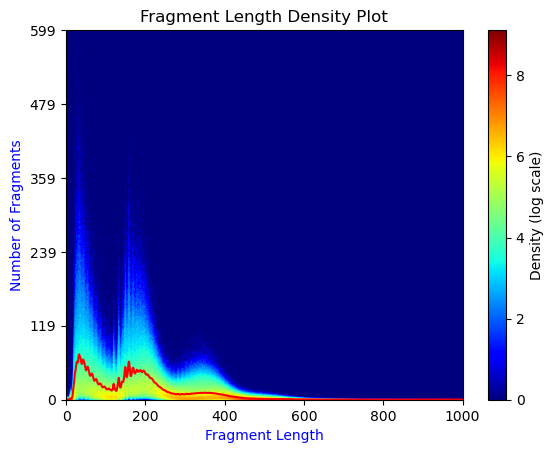

calculating scores using the custom continues wavelet transformation...


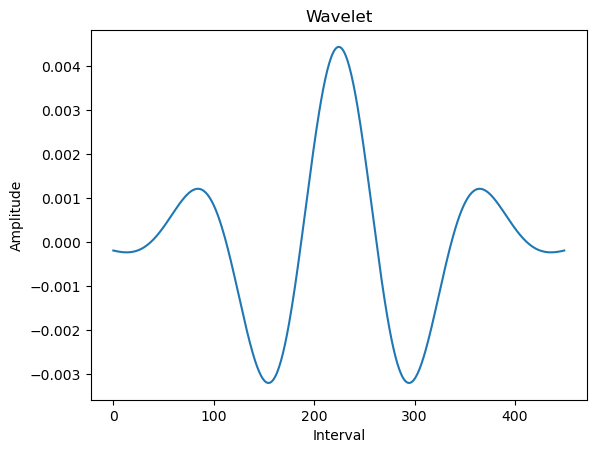

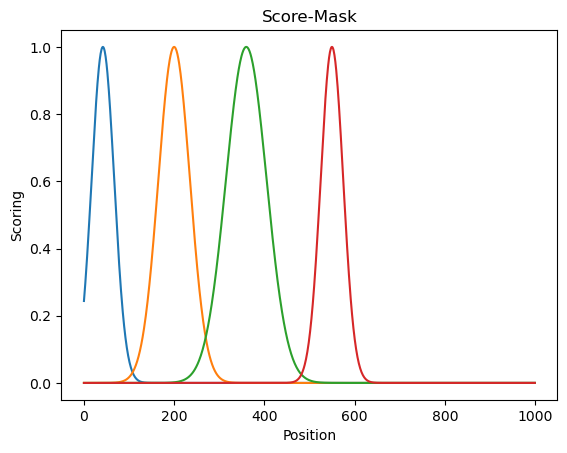

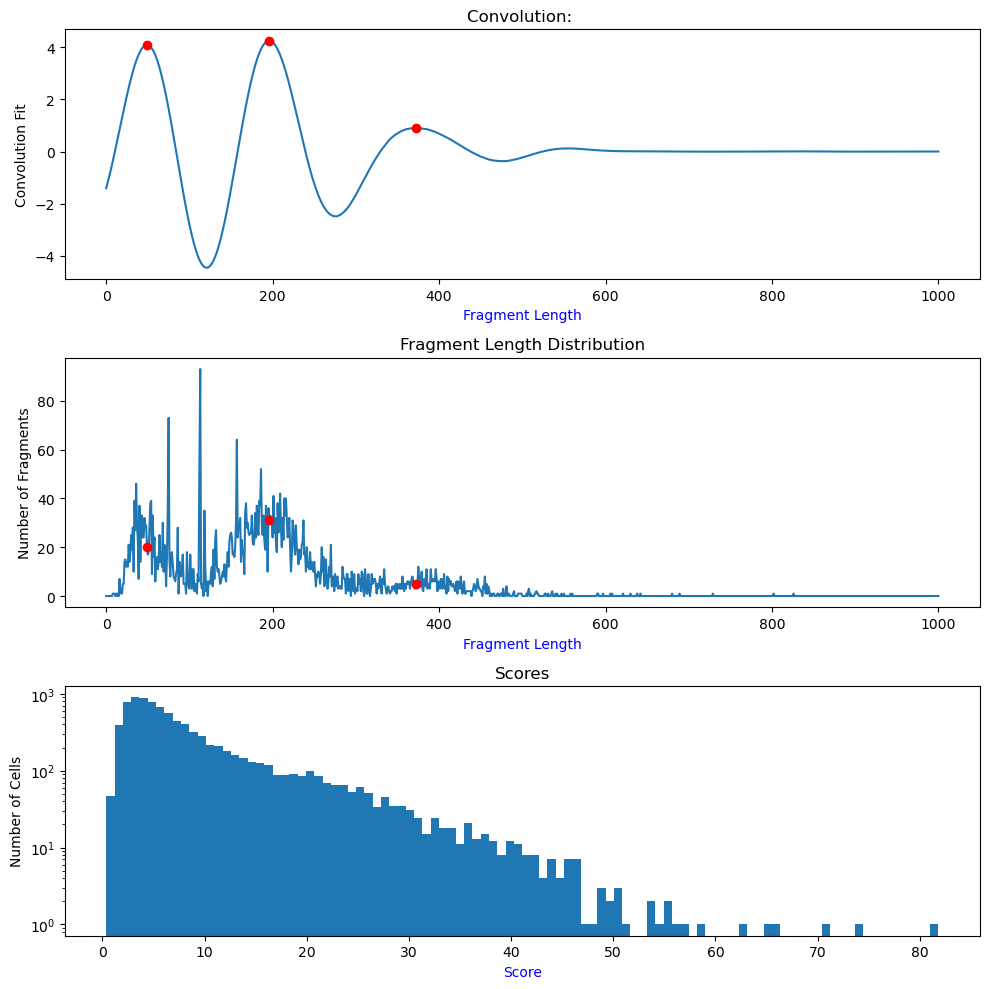

In [5]:
adata_f = add_fld_metrics(adata=adata_f,
                        fragments=fragments_file,
                        barcode_col=None,
                        chunk_size_fragments=5000000,
                        peaks_thr=0.5,
                        wavelength=150,
                        sigma=0.4,
                        plot=True,
                        save_density=None,
                        save_overview=None,
                        sample=0,
                        n_threads=12)

In [6]:
adata_f.obs

,logUMI,tsse,tissue,cell type,Life stage,closest Cell Ontology term(s),Cell Ontology ID,fld_score,mean_fragment_size,n_fragments
stripped_barcodes,,,,,,,,,,
TAGTGCTGTCTCGCTTAGCCTT,3.103119,15.499255,heart_lv_SM-JF1NY,Naive T cell,Adult,naive t cell,CL:0000898,1.122236,156.14,2104
AAATCCGCATAACCGCTAATGA,3.395326,10.463122,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,3.200758,174.73,4213
AAATCCGCATACCAATCGCTTG,3.523876,13.254036,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,4.865203,181.79,6414
AAATCCGCATACGCGGTATGTA,3.231979,10.817031,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,2.402610,176.91,3797
AAATCCGCATATTAGGAGGTCT,3.202488,10.634648,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,2.855965,194.39,2896
...,...,...,...,...,...,...,...,...,...,...
TACCGTACCTCAGACCTGCTCA,3.558709,9.710744,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,6.728133,193.34,6297
TAGACCAGGGCTTGCTGCCTAT,4.027431,7.671653,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,12.487313,166.00,19250
TATGTATGGCTTAGCTTCTCTG,3.456062,16.223776,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,5.358705,181.55,4939


Opening bam file...
Creating chunks of size 1000000bp...
Counting insertsizes across 3103 chunks...


100%|██████████| 3103/3103 [22:32<00:00,  2.29it/s]


Done reading file - elapsed time: 0:22:32
Converting counts to dataframe...
Done getting insertsizes from fragments!
plotting density...


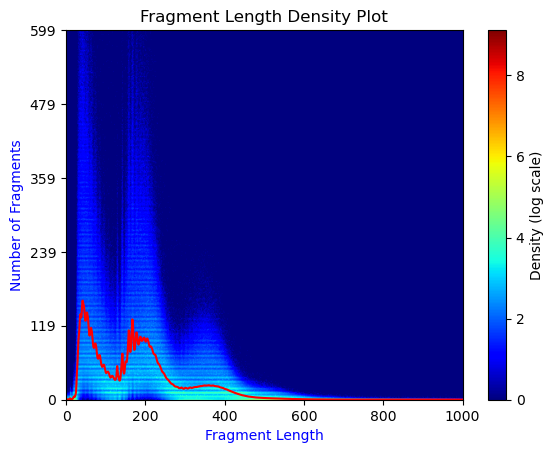

calculating scores using the custom continues wavelet transformation...


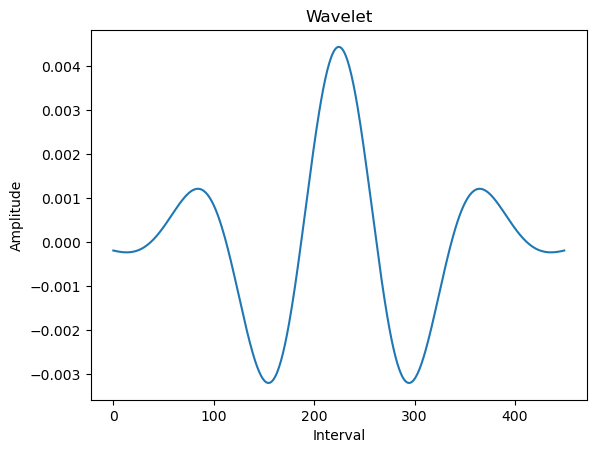

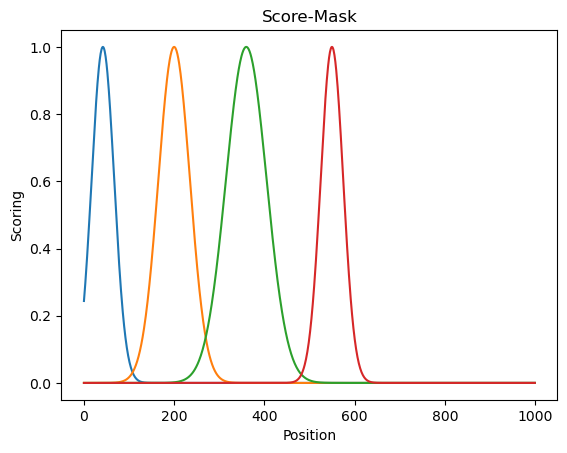

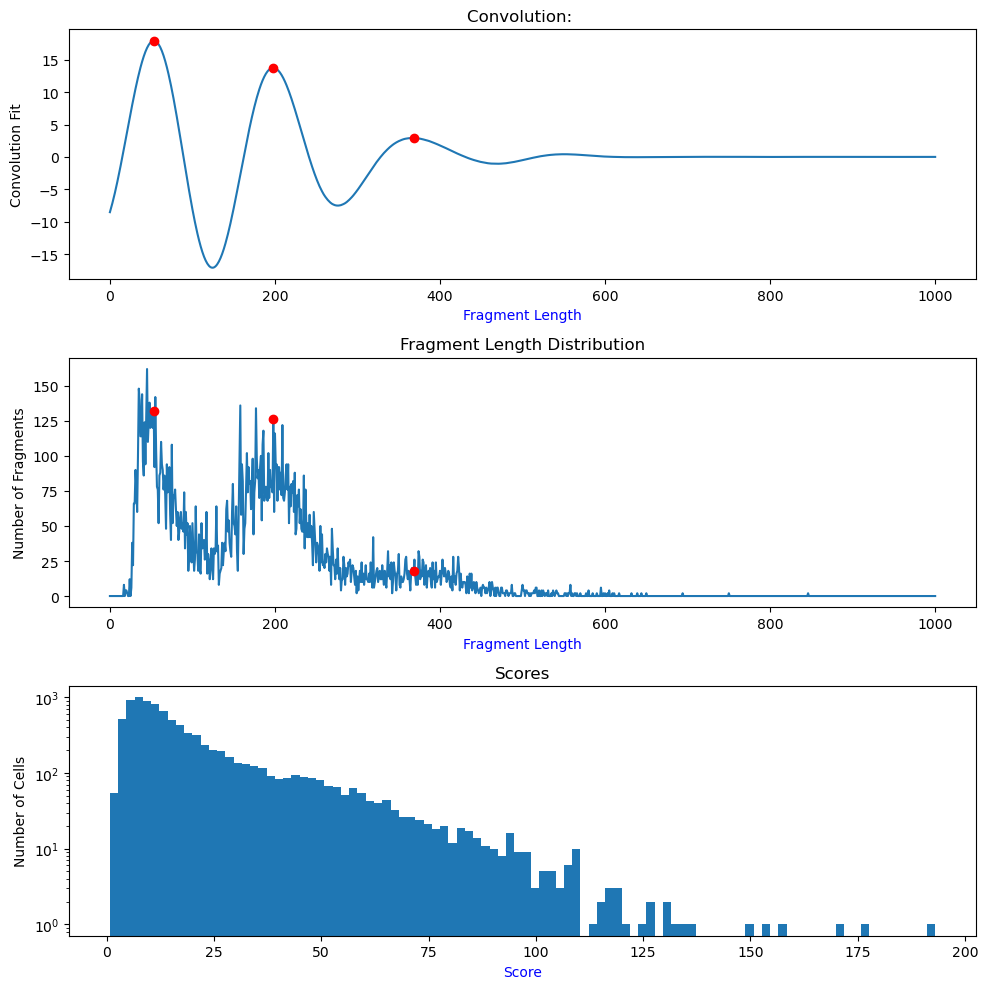

In [8]:
adata_b = add_fld_metrics(adata=adata_b,
                        bam=bamfile,
                        barcode_col=None,
                        barcode_tag="CB",
                        chunk_size_bam=1000000,
                        regions=None,
                        peaks_thr=0.5,
                        wavelength=150,
                        sigma=0.4,
                        plot=True,
                        save_density=None,
                        save_overview=None,
                        sample=0,
                        n_threads=12)

In [9]:
adata_b.obs

,logUMI,tsse,tissue,cell type,Life stage,closest Cell Ontology term(s),Cell Ontology ID,fld_score,mean_fragment_size,n_fragments
stripped_barcodes,,,,,,,,,,
TAGTGCTGTCTCGCTTAGCCTT,3.103119,15.499255,heart_lv_SM-JF1NY,Naive T cell,Adult,naive t cell,CL:0000898,2.426509,154.90,4988
AAATCCGCATAACCGCTAATGA,3.395326,10.463122,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,7.038261,164.56,9646
AAATCCGCATACCAATCGCTTG,3.523876,13.254036,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,10.444812,166.27,14133
AAATCCGCATACGCGGTATGTA,3.231979,10.817031,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,5.115731,153.33,8662
AAATCCGCATATTAGGAGGTCT,3.202488,10.634648,heart_lv_SM-JF1NY,Macrophage (General),Adult,macrophage,CL:0000235,6.778619,173.66,6812
...,...,...,...,...,...,...,...,...,...,...
TACCGTACCTCAGACCTGCTCA,3.558709,9.710744,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,14.259680,182.41,14357
TAGACCAGGGCTTGCTGCCTAT,4.027431,7.671653,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,26.841875,158.86,42000
TATGTATGGCTTAGCTTCTCTG,3.456062,16.223776,heart_lv_SM-JF1NY,Pericyte (General) 2,Adult,pericyte cell,CL:0000669,12.202152,171.06,10995


In [40]:
round(wav_1[peaks_1[0][0]] / wav_1[peaks_1[0][1]], 1) == 1

True

In [41]:
round(wav_2[peaks_2[0][0]] / wav_2[peaks_2[0][1]], 1) == 0.3

True

In [42]:
# check for the correct wavelength
wav_1 = cos_wavelet(wavelength=100,
                amplitude=1.0,
                phase_shift=0,
                mu=0.0,
                sigma=10,
                plot=False,
                save=None) 

peaks_1 = call_peaks([wav_1])

99 == peaks_1[0][1] - peaks_1[0][0]
100 == peaks_1[0][2] - peaks_1[0][1]

# check if centered
wav_2 = cos_wavelet(wavelength=100,
                amplitude=1.0,
                phase_shift=0,
                mu=0.0,
                sigma=0.4,
                plot=False,
                save=None) 

peaks_2 = call_peaks([wav_2])
np.where(np.max(wav_2) == wav_2)[0][0] == 149 # check if centered

# check if sigma scales the cosine 
round(wav_1[peaks_1[0][0]] / wav_1[peaks_1[0][1]], 1) == 1
round(wav_2[peaks_2[0][0]] / wav_2[peaks_2[0][1]], 1) == 0.3

# check if its shifting
wav_3 = cos_wavelet(wavelength=100,
                amplitude=1.0,
                phase_shift=np.pi,
                mu=0.0,
                sigma=10,
                plot=False,
                save=None) 

peaks_3 = call_peaks([wav_3])
np.where(np.max(wav_3) == wav_3)[0][0] == 100  # half the wavelength shift compared to before


wav_4 = cos_wavelet(wavelength=100,
                amplitude=1.0,
                phase_shift=0,
                mu=100,
                sigma=0.4,
                plot=False,
                save=None) 

peaks_4 = call_peaks([wav_4])
np.where(np.max(wav_4) == wav_4)[0][0]  == 249  # one wavelength shift for the gauss curve compared to before

True

In [48]:
wavelength = 100
wavl_scale = int(wavelength * 1.5)
x = np.linspace(-wavl_scale, wavl_scale, wavl_scale * 2)

In [49]:
len(x)

300

In [50]:
len(wav)

300

In [51]:
amplitude = 1
frequency = 1.5 / wavl_scale
phase_shift = 0
cosine_curve = amplitude * np.cos(2 * np.pi * frequency * x + phase_shift)

In [52]:
len(cosine_curve)

300

In [53]:
sigma = 0.4
mu = 0
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
wavelet = cosine_curve * gaussian

In [54]:
len(wav)

300

In [55]:
len(gaussian)

300

In [56]:
len(cosine_curve)

300

In [28]:
@beartype
def gauss(x: npt.ArrayLike,
          mu: int | float,
          sigma: int | float) -> npt.ArrayLike:
    """
    Calculate the values of the Gaussian function for a given x, mu and sigma.

    Parameters
    ----------
    x : npt.ArrayLike
        x values
    mu : float
        mu value
    sigma : float
        sigma value

    Returns
    -------
    float
        Value of the Gaussian function for the given x, mu and sigma.
    """

    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    return gaussian

array([[2.43850832e-001, 2.60609302e-001, 2.78073319e-001, ...,
        2.93386556e-318, 6.34083850e-319, 1.36846303e-319],
       [8.11867116e-008, 9.55616260e-008, 1.12389794e-007, ...,
        1.31447327e-113, 6.84510038e-114, 3.56166155e-114],
       [1.26645716e-014, 1.51275379e-014, 1.80605553e-014, ...,
        2.24726866e-044, 1.63900939e-044, 1.19479388e-044],
       [7.95803557e-106, 1.91875467e-105, 4.61888088e-105, ...,
        1.85772731e-070, 9.05777084e-071, 4.40924700e-071]])

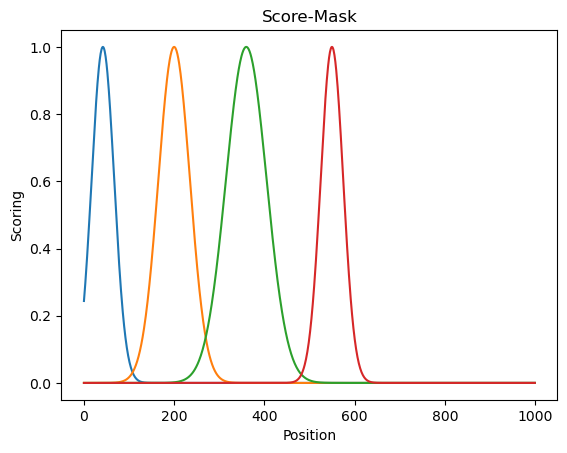

In [31]:
mask, pl = build_score_mask(plot=True,
                     save=None,
                     mu_list=[42, 200, 360, 550],
                     sigma_list=[25, 35, 45, 25])
mask

In [30]:
np.concatenate(call_peaks(mask))

array([ 42, 200, 360, 549])

In [34]:
type(pl[1])

matplotlib.axes._subplots.AxesSubplot

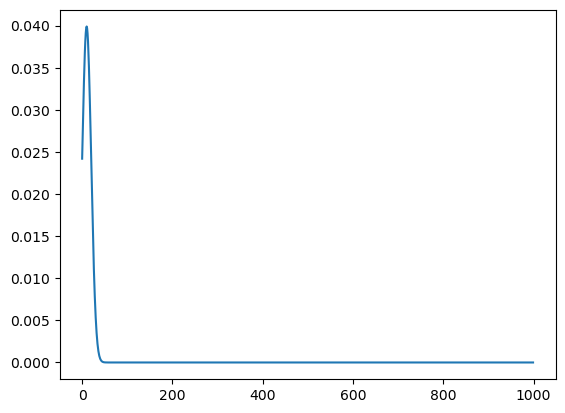

In [38]:
x = np.linspace(0, 1000, 1000)
mu = 10 # Mean of the Gaussian
sig = 10 # Standard deviation of the Gaussian
plt.plot(gauss(x, mu, sig))

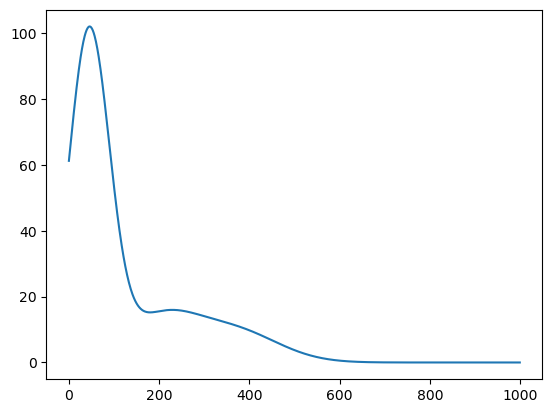

In [57]:
def gaussian(x, mu, sig):  # Gaussian function
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

curves = []
x_values = np.linspace(0, 1000, 1000)
for mu, sig in [(45, 45), (200, 80), (360, 100)]:  # Gaussian curves with different means and standard deviations
    curves.append(gaussian(x_values, mu, sig))

curves[1] = curves[1] / 1  # Peak 1
curves[1] = curves[1] / 8  # Peak 2
curves[2] = curves[2] / 10  # Bias
sum_c = np.sum(curves, axis=0)  # Sum of the curves

plt.plot(sum_c*100) 

In [50]:
sum_c

array([6.07458654e-01, 6.21003619e-01, 6.34538257e-01, 6.48048966e-01,
       6.61521901e-01, 6.74942990e-01, 6.88297961e-01, 7.01572370e-01,
       7.14751621e-01, 7.27820999e-01, 7.40765691e-01, 7.53570822e-01,
       7.66221477e-01, 7.78702737e-01, 7.90999705e-01, 8.03097538e-01,
       8.14981480e-01, 8.26636890e-01, 8.38049278e-01, 8.49204333e-01,
       8.60087956e-01, 8.70686293e-01, 8.80985766e-01, 8.90973103e-01,
       9.00635370e-01, 9.09960002e-01, 9.18934833e-01, 9.27548124e-01,
       9.35788592e-01, 9.43645438e-01, 9.51108375e-01, 9.58167651e-01,
       9.64814077e-01, 9.71039048e-01, 9.76834565e-01, 9.82193258e-01,
       9.87108405e-01, 9.91573948e-01, 9.95584513e-01, 9.99135421e-01,
       1.00222270e+00, 1.00484311e+00, 1.00699414e+00, 1.00867400e+00,
       1.00988168e+00, 1.01061688e+00, 1.01088009e+00, 1.01067253e+00,
       1.00999618e+00, 1.00885378e+00, 1.00724879e+00, 1.00518544e+00,
       1.00266866e+00, 9.99704117e-01, 9.96298188e-01, 9.92457935e-01,
      

In [54]:
call_peaks_worker( sum_c)

array([ 46, 204])

In [54]:
gauss(x=np.linspace(-50, 50, 50), mu=10, sigma=10)

array([6.07588285e-10, 2.02467127e-09, 6.47159873e-09, 1.98417775e-08,
       5.83527736e-08, 1.64609299e-07, 4.45409176e-07, 1.15604806e-06,
       2.87809118e-06, 6.87298100e-06, 1.57433689e-05, 3.45909215e-05,
       7.29018461e-05, 1.47376030e-04, 2.85776896e-04, 5.31544108e-04,
       9.48338617e-04, 1.62292891e-03, 2.66408140e-03, 4.19476289e-03,
       6.33547641e-03, 9.17831740e-03, 1.27543638e-02, 1.70006865e-02,
       2.17363217e-02, 2.66573872e-02, 3.13589159e-02, 3.53847746e-02,
       3.82986760e-02, 3.97615239e-02, 3.95962642e-02, 3.78231191e-02,
       3.46555184e-02, 3.04578605e-02, 2.56766476e-02, 2.07629558e-02,
       1.61046753e-02, 1.19819278e-02, 8.55093015e-03, 5.85345052e-03,
       3.84346099e-03, 2.42072211e-03, 1.46244429e-03, 8.47472580e-04,
       4.71068338e-04, 2.51162101e-04, 1.28450628e-04, 6.30130197e-05,
       2.96507911e-05, 1.33830226e-05])

In [17]:
wavl_scale = 500
x = np.linspace(-wavl_scale, wavl_scale, wavl_scale * 2)
x

array([-500.        , -498.998999  , -497.997998  , -496.996997  ,
       -495.995996  , -494.99499499, -493.99399399, -492.99299299,
       -491.99199199, -490.99099099, -489.98998999, -488.98898899,
       -487.98798799, -486.98698699, -485.98598599, -484.98498498,
       -483.98398398, -482.98298298, -481.98198198, -480.98098098,
       -479.97997998, -478.97897898, -477.97797798, -476.97697698,
       -475.97597598, -474.97497497, -473.97397397, -472.97297297,
       -471.97197197, -470.97097097, -469.96996997, -468.96896897,
       -467.96796797, -466.96696697, -465.96596597, -464.96496496,
       -463.96396396, -462.96296296, -461.96196196, -460.96096096,
       -459.95995996, -458.95895896, -457.95795796, -456.95695696,
       -455.95595596, -454.95495495, -453.95395395, -452.95295295,
       -451.95195195, -450.95095095, -449.94994995, -448.94894895,
       -447.94794795, -446.94694695, -445.94594595, -444.94494494,
       -443.94394394, -442.94294294, -441.94194194, -440.94094

In [61]:
def good_modulation():
    """Create a modulation curve."""

    mus = [45, 200, 360]
    sigs = [45, 55, 100]
    divs = [1, 2, 6]

    return modulation(mus, sigs, divs)


def bad_modulation():
    """Create a modulation curve."""

    mus = [45, 100, 360]
    sigs = [45, 80, 100]
    divs = [1, 8, 10]

    return modulation(mus, sigs, divs)


def modulation(mus, sigs, divs):
    """Build a modulation curve."""
    def gaussian(x, mu, sig):  # Gaussian function
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    curves = []
    x_values = np.linspace(0, 1000, 1000)
    for mu, sig in [(mus[0], sigs[0]), (mus[1], sigs[1]), (mus[2], sigs[2])]:  # Gaussian curves with different means and standard deviations
        curves.append(gaussian(x_values, mu, sig))

    curves[1] = curves[1] / divs[0]  # Peak 1
    curves[1] = curves[1] / divs[1] # Peak 2
    curves[2] = curves[2] / divs[2]  # Bias
    sum_c = np.sum(curves, axis=0)  # Sum of the curves

    return (sum_c * 100)

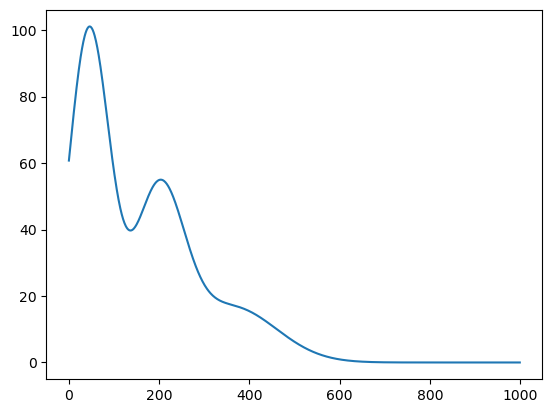

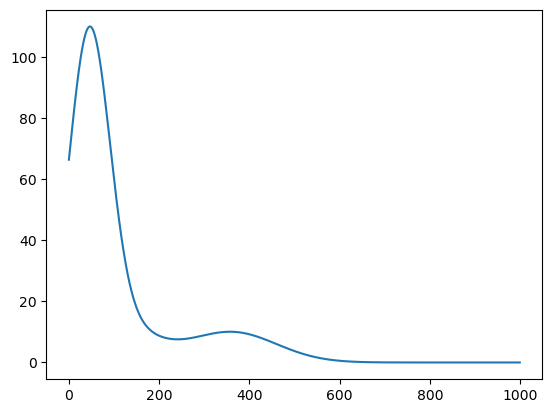

In [62]:
good_modulation_arr = good_modulation()
bad_modulation_arr = bad_modulation()
plt.plot(good_modulation_arr)
plt.show()
plt.plot(bad_modulation_arr)
plt.show()

In [64]:
call_peaks([good_modulation_arr, bad_modulation_arr])

[array([ 46, 204]), array([ 47, 357])]

In [63]:
score_mask(good_modulation_arr)

TypeError: score_mask() missing 1 required positional argument: 'convolved_data'

In [ ]:
count_table_ori = ins.insertsize_from_fragments(fragments=fragments_file,
                              barcodes=barcodes,
                              n_threads=8)

count_table = count_table_ori.copy()

In [ ]:
count_table = count_table_ori.copy()

In [ ]:
means = count_table.pop('mean_insertsize')
insert_counts = count_table.pop('insertsize_count')
barcodes = count_table.index
# Assuming count_table is your DataFrame and you're trying to convert 'dist' column to a numpy array of type int64
dists_arr = np.array(count_table['dist'].tolist(), dtype=np.int64)
dists_arr

In [ ]:
# --> Remove empty cells

In [ ]:
def count_overlap(index1, index2):
    """
    Counts the number of overlapping elements between two indices.
    
    Parameters:
    - index1: Index of the first DataFrame.
    - index2: Index of the second DataFrame.
    
    Returns:
    - int: The count of overlapping elements.
    """
    # Convert both indices to sets to ensure unique elements
    set1 = set(index1)
    set2 = set(index2)
    
    # Find the intersection of both sets
    overlap = set1.intersection(set2)
    
    # Return the size of the intersection
    return len(overlap)

In [ ]:
plot = True
save_plots = 'density_plot'
# plot the densityplot of the fragment length distribution
if plot:
    print("plotting density...")
    density_plot(dists_arr, max_abundance=600, save=save_plots)

In [ ]:
wavelength = 150
sigma = 0.4
plot=True
n_threads=8
peaks_thr=0.5
save_overview='ov_test'
sample=0


print("calculating scores using the custom continues wavelet transformation...")
conv_scores = score_by_conv(data=dists_arr,
                            wavelength=wavelength,
                            sigma=sigma,
                            plot_wavl=plot,
                            n_threads=n_threads,
                            peaks_thr=peaks_thr,
                            operator='bigger',
                            plot_mask=plot,
                            plot_ov=plot,
                            save=save_overview,
                            sample=sample)


In [ ]:
inserts_df = pd.DataFrame(data={'fld_score':conv_scores,
                                'mean_fragment_size': means,
                                'n_fragments':insert_counts},
                          index=barcodes)

inserts_df

In [ ]:
inserts_df.shape

In [ ]:
adata.obs.shape

In [ ]:
adata.obs = adata.obs.join(inserts_df)

adata.obs['fld_score'] = adata.obs['fld_score'].fillna(0)
adata.obs['mean_fragment_size'] = adata.obs['mean_fragment_size'].fillna(0)
adata.obs['n_fragments'] = adata.obs['n_fragments'].fillna(0)

In [ ]:
adata.obs